Algorithm to be implemented 
```
function line _search(f,x,d)
  objective = alpha = f(x+alpha*d)
  a,b = bracket_minimum(objective)
  alpha = minimize(objective,a,b)
  return x+alpha*d
end
```
Example to be implemented. :
Consider conducting a line search on $f(x_1,x_2,x_3)=sin(x_1,x_2)+e^{(x_2+x_3)} -x_3$  from $x=[1,2,3]$ in the direction $d=[0,-1,-1]$.  The corresponding optimization problem is :

Minimize: 

=>$sin((1+0*\alpha)(2+(-1)*\alpha))+ e^{(2+(-1)*\alpha)+(3+(-1)*\alpha)} - (3+(-1)*\alpha)$

=>$sin(2-2\alpha) +e^{(5-2\alpha)} +\alpha - 3$

The solution is  $\alpha \approx 3.127$ and $x \approx [1,-1.126, -0.126].$


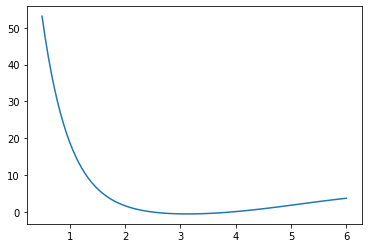

In [44]:
# Plotting the Objective function of alpha that needs to be minimized
import numpy as np
import math
import matplotlib.pyplot as plt

x_axis = np.linspace(0.5,6.0,100)
y_axis = list(map(lambda alpha : math.sin(2-alpha)+math.exp(5-2*alpha)+alpha-3,x_axis))
plt.plot(x_axis,y_axis)
plt.show()

In [40]:
# function to find the initial bracket of the objective function 
# Have directly specified the simplified version of the function
def f(alpha):
  
  return math.sin(2-alpha)+math.exp(5-2*alpha)+alpha-3

# derivative of the objective function 

def f_der(f,alpha):
  h = 0.00001
  return (f(alpha+h)-f(alpha))/h

In [ ]:
'''Function to find the range in the function which contains the minimum value of the function
    Satisfying the condition   f(x1)>f(x0)<f(x2)'''

def initial_bracket(alpha,fac,eps):

  i = 1

  x0, f_x0 = alpha, f(alpha)

  x1 = x0 + (fac*i)*eps

  f_x1 = float("%.4f"% f(x1))


  if f_x0 < f_x1 : #''' We reverse the bracket direction, if this condition is true in the initial initiation'''
    j = i*2 
    x0 = x1
    eps = -eps
    x1 = x0 + (fac*j)*eps
  
  i = i*2
  x2 = x1 + (fac*i) * eps # finding the next point x2, such that f(x2)>f(x1)
  f_x2 = float("%.4f" % f(x2))
  iter = 1

  # Storing the data at the iteration level.
  
  if (f_x1 > f_x2): #''' Check for f(x2) > f(x1)'''
    
    while (f_x1 > f_x2): #Finding the point in the function which is greater than f(x2) such that f(x1)>f(x2)<f(x3).     

      iter+=1  
      x0, x1 = x1, x2   
      f_x0, f_x1 = f(x0), f(x1)
      i = i*2
      x2 = x2 + (fac*i) * eps
      f_x2 = float("%.4f" % f(x2))
     
    return [x0,x2]

  else:
 
    return [x0,x2]

In [41]:
def bisection_root_finding(a,b,eps):

  if a > b : 
    a,b = b,a 
  
  f_a, f_b = f_der(f,a), f_der(f,b)


  if f_a == 0:
    b = a
    return (a)

  if f_b == 0:
    a = b
    return (b)
  iter = 0
 
  while abs(b - a) > eps:
    iter +=1

    x = (a+b)/2

 
    y = f_der(f,x)

  

    if y == 0:
      a,b = x, x
      break

    if np.sign(y)  < 0  :
      a = x
    
    else:
      b = x

  return (a+b)/2

In [42]:
def line_search(alpha,x,d):
  
  a,b = initial_bracket(alpha,fac=2,eps=0.01)
  print("Initial Bracket a,b:",a,b)
  alpha = bisection_root_finding(a,b,eps=1e-5)
  print("Value of alpha",alpha)
  return (x+alpha*d)

In [45]:
alpha  = 0
x = np.array([1,2,3])
d = np.array([0,-1,-1])
line_search(alpha,x,d)

Initial Bracket a,b: 1.2600000000000002 5.1
 Value of alpha 3.1270422363281245


array([ 1.        , -1.12704224, -0.12704224])